The Van der Pol equation reads as follows
\begin{gather}
y'' + \mu (y^2-1)y' + y =0  \qquad \mu>0\ ,
\end{gather}
is a 2nd-order non-linear autonomous ODE. It can be interpreted as a model for a spring-mass system where the damping force $\mu (y^2-1)$ depends on the position $y$ and the parameter $\mu$ indicates the strength of the damping.


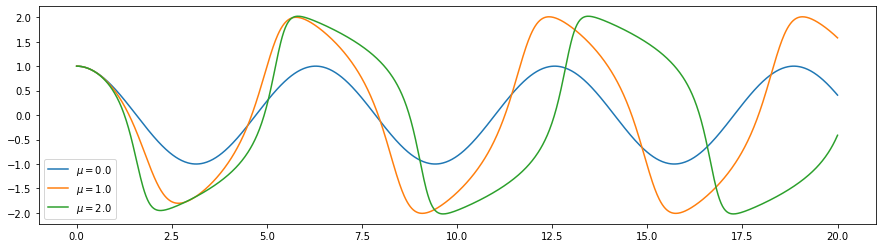

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def dydt(Y, t,mu):
    y1, y2 = Y
    return [y2, mu *(1-np.power(y1,2))*y2 -y1 ] 

plt.figure(figsize=(15, 4))
for mu in [0.0, 1.0, 2.0]:
    tspan = np.linspace(0, 20, 1000)
    y0 = [1.0, 0.0]
    ys = odeint(dydt, y0, tspan,args=(mu,))
    plt.plot(tspan, ys[:,0]) # path

plt.legend([f"$\mu={m}$" for m in [0.0, 1.0, 2.0]])
plt.show()


We can inspect its possible equilibrium points and force lines:

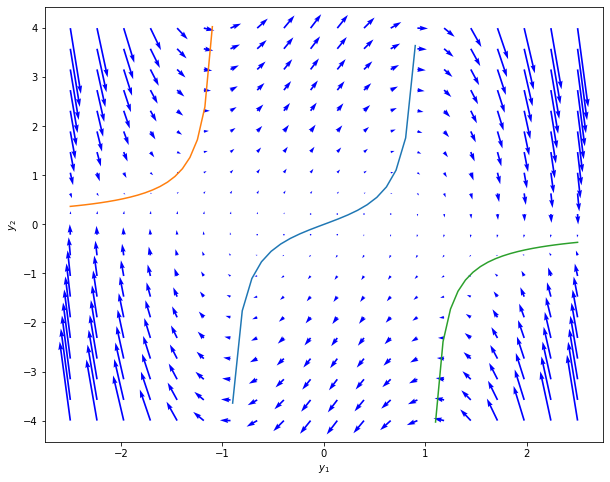

In [26]:
y1 = np.linspace(-2.5, 2.5, 20)
y2 = np.linspace(-4.0, 4.0, 20)
xx = np.linspace(-.9, 0.9, 20)
xpos = np.linspace(1.1, 2.5, 20)
xneg = np.linspace(-2.5, -1.1, 20)



Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape

mu = 1.3


## plot vector field
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = dydt([x, y], t,mu)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

plt.figure(figsize=(10, 8))
plt.quiver(Y1, Y2, u, v, color='blue')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

## plot the lines where the vertical component of the force field vanishes
plt.plot(xx, xx/(mu*(1-xx**2)))
plt.plot(xneg, xneg/(mu*(1-xneg**2)))
plt.plot(xpos, xpos/(mu*(1-xpos**2)))
plt.show()

We plotted a collection of trajectories on the phase space for different initial velocities `y20`. The round dots are the initial conditions, the squared dots are the final location of the vector solution at time $T=20$. 

The limit cycle is easily identifiable.

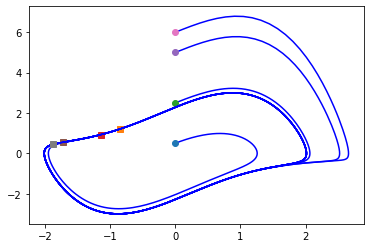

In [29]:
mu - 1.3

for y20 in [0.5, 2.5,5 ,6]:
    tspan = np.linspace(0, 20, 1000)
    y0 = [0.0, y20]
    ys = odeint(dydt, y0, tspan, args=(mu,))
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start

    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
